In [41]:
import numpy as np 
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [42]:
df = pd.read_csv("../input/gtd/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

In [43]:
cols=['iday','iyear','extended','vicinity','crit1','crit2','crit3','multiple','suicide','property','ishostkid','targtype1','attacktype1','weaptype1'] #columns to be selected
for col in cols:
    analysis = df.groupby(col).success.value_counts()
    stat, p, dof, expected = chi2_contingency(analysis.unstack())
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print(col)
    print('dof=%d' % dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent,so we have to reject H0')
    else:
        print('Independent, so we cant reject reject H0')
    print('\n')

iday
dof=31
probability=0.950, critical=44.985, stat=93.820
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


iyear
dof=46
probability=0.950, critical=62.830, stat=3640.912
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


extended
dof=1
probability=0.950, critical=3.841, stat=973.303
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


vicinity
dof=2
probability=0.950, critical=5.991, stat=nan
Independent (fail to reject H0)
significance=0.050, p=nan
Independent, so we cant reject reject H0


crit1
dof=1
probability=0.950, critical=3.841, stat=20.611
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


crit2
dof=1
probability=0.950, critical=3.841, stat=32.481
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


crit3
dof=1
probability=0.950, critical=3.841, stat=33.858
Dependent (reject H0)
significance=0.050, p=0.0

In [44]:
gname_count=dict()
for i in range(len(df['success'])):
    if df['gname'][i] not in gname_count:
        gname_count[df['gname'][i]]=[0,0]
    gname_count[df['gname'][i]][0]+=1
    if df['success'][i]==1:
        gname_count[df['gname'][i]][1]+=1


In [45]:
l=[[],[],[]]
#l[0] stores names, l[1] stores corresponding group's number of attacks, l[2] stores number of successful attacks
for name in gname_count:
    if gname_count[name][0]>2000 and name!='Unknown':
        l[0].append(name)
        l[1].append(gname_count[name][0])
        l[2].append(gname_count[name][1])
print(len(gname_count))
print(len(l[0]))

3537
11


In [46]:
group_success_rate=[]
for i in range(len(l[0])):
    group_success_rate.append(l[2][i]*100/l[1][i])

In [47]:
#sorting in decreasing order based on total number of attacks
for i in range(len(l[0])):
    for j in range(i+1,len(l[0])):
        if(l[1][i]<l[1][j]):
            temp=l[1][i]
            temp2=l[0][i]
            temp3=l[2][i]
            temp4=group_success_rate[i]
            l[1][i]=l[1][j]
            l[0][i]=l[0][j]
            l[2][i]=l[2][j]
            group_success_rate[i]=group_success_rate[j]
            l[1][j]=temp
            l[0][j]=temp2
            l[2][j]=temp3
            group_success_rate[j]=temp4


Text(0, 0.5, 'Number of Attacks')

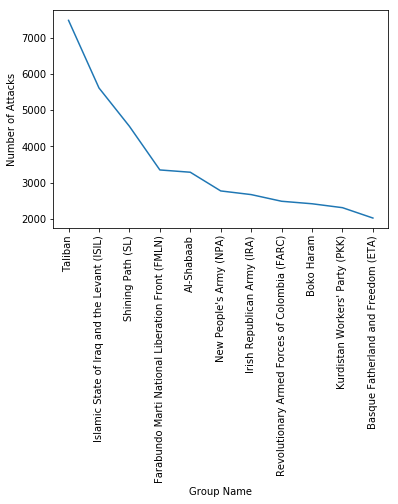

In [48]:
import matplotlib.pyplot as plt
plt.xticks(rotation = "vertical")
plt.plot(l[0],l[1])
plt.xlabel('Group Name')
plt.ylabel('Number of Attacks')


In [49]:
for i in range(len(l[0])):
    print(l[0][i],group_success_rate[i])

Taliban 89.32869751270393
Islamic State of Iraq and the Levant (ISIL) 84.7853197933369
Shining Path (SL) 95.21405049396267
Farabundo Marti National Liberation Front (FMLN) 98.98537749925396
Al-Shabaab 91.72749391727494
New People's Army (NPA) 88.63636363636364
Irish Republican Army (IRA) 85.43616622987645
Revolutionary Armed Forces of Colombia (FARC) 92.56131885806192
Boko Haram 92.92803970223325
Kurdistan Workers' Party (PKK) 94.15584415584415
Basque Fatherland and Freedom (ETA) 85.0296442687747


In [119]:
cols.append("success")
new_table = df.filter(cols,axis = 1)
#new_table_2 = new_table.astype({"property":bool,"crit1":bool,"crit2":bool,"crit3":bool,"multiple":bool,"suicide":bool:})
new_table.info(verbose = True)
new_table.property.replace(-9,0,inplace = True)
new_table.describe()
type(new_table)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
iday           181691 non-null int64
iyear          181691 non-null int64
extended       181691 non-null int64
vicinity       181691 non-null int64
crit1          181691 non-null int64
crit2          181691 non-null int64
crit3          181691 non-null int64
multiple       181690 non-null float64
suicide        181691 non-null int64
property       181691 non-null int64
ishostkid      181513 non-null float64
targtype1      181691 non-null int64
attacktype1    181691 non-null int64
weaptype1      181691 non-null int64
success        181691 non-null int64
success        181691 non-null int64
success        181691 non-null int64
success        181691 non-null int64
success        181691 non-null int64
dtypes: float64(2), int64(17)
memory usage: 26.3 MB


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


pandas.core.frame.DataFrame

In [85]:
'''
extended_count=0
vicinity_count=0
crit1_count=0
crit2_count=0
crit3_count=0
multiple_count=0
suicide_count=0
property_count=0
ishostkid_count=0
ransom_count=0

targtype1_count=[0 for i in range(0,22)]
targtype2_count=[0 for i in range(0,22)]
targtype3_count=[0 for i in range(0,22)]

attacktype1_count=[0 for i in range(0,9)]
attacktype2count=[0 for i in range(0,9)]
attacktype3_count=[0 for i in range(0,9)]

weaptype1_count=[0 for i in range(0,14)]
weaptype2_count=[0 for i in range(0,14)]
weaptype3_count=[0 for i in range(0,14)]
weaptype4_count=[0 for i in range(0,14)]

for i in range(len(df['success'])):
    if df['success'][i]==1 and df['extended'][i]==1:
        extended_count+=1
    if df['success'][i]==1 and df['vicinity'][i]==1:
        vicinity_count+=1
    if df['success'][i]==1 and df['crit1'][i]==1:
        crit1_count+=1
    if df['success'][i]==1 and df['crit2'][i]==1:
        crit2_count+=1
    if df['success'][i]==1 and df['crit3'][i]==1:
        crit3_count+=1
    if df['success'][i]==1 and df['multiple'][i]==1:
        multiple_count+=1
    if df['success'][i]==1 and df['suicide'][i]==1:
        suicide_count+=1
    if df['success'][i]==1 and df['property'][i]==1:
        property_count+=1
    if df['success'][i]==1 and df['ishostkid'][i]==1:
        ishostkid_count+=1
    if df['success'][i]==1 and df['ransom'][i]==1:
        ransom_count+=1
        
    for j in range(1,23):
        if df['success'][i]==1 and df['targtype1'][i]==j:
            targtype1_count[j-1]+=1
        if df['success'][i]==1 and df['targtype2'][i]==j:
            targtype2_count[j-1]+=1
        if df['success'][i]==1 and df['targtype3'][i]==j:
            targtype3_count[j-1]+=1
    
    for j in range(1,10):
        if df['success'][i]==1 and df['attacktype1'][i]==j:
            attacktype1_count[j-1]+=1
    for j in range(1,10):
        if df['success'][i]==1 and df['attacktype2'][i]==j:
            attacktype2_count[j-1]+=1
    for j in range(1,10):
        if df['success'][i]==1 and df['attacktype3'][i]==j:
            attacktype3_count[j-1]+=1
    
    for j in range(1,14):
        if df['success'][i]==1 and df['weaptype1'][i]==j:
            weaptype1_count[j-1]+=1
    for j in range(1,14):
        if df['success'][i]==1 and df['weaptype2'][i]==j:
            weaptype2_count[j-1]+=1
    for j in range(1,14):
        if df['success'][i]==1 and df['weaptype3'][i]==j:
            weaptype3_count[j-1]+=1
    for j in range(1,14):
        if df['success'][i]==1 and df['weaptype4'][i]==j:
            weaptype4_count[j-1]+=1
    
print('extended')
print(extended_count, extended_count/total_success*100)
print('\n')
print('vicinity')
print(vicinity_count, vicinity_count/total_success*100)
print('\n')
print('crit1')
print(crit1_count, crit1_count/total_success*100)
print('\n')
print('crit2')
print(crit2_count, crit2_count/total_success*100)
print('\n')
print('crit3')
print(crit3_count, crit3_count/total_success*100)
print('\n')
print('multiple')
print(multiple_count, multiple_count/total_success*100)
print('\n')
print('suicide')
print(suicide_count, suicide_count/total_success*100)
print('\n')
print('property')
print(property_count, property_count/total_success*100)
print('\n')
print('ishostkid')
print(ishostkid_count, ishostkid_count/total_success*100)
print('\n')
print('ransom')
print(ransom_count, ransom_count/total_success*100)
print('\n')

print('targtype1')
for j in range(1,23):
    print(j,targtype1_count[j-1],targtype1_count[j-1]/total_success*100)
print('\n')
print('targtype2')
for j in range(1,23):
    print(j,targtype2_count[j-1],targtype2_count[j-1]/total_success*100)
print('\n')
print('targtype3')
for j in range(1,23):
    print(j,targtype3_count[j-1],targtype3_count[j-1]/total_success*100)
print('\n')

print('attacktype1')
for j in range(1,10):
    print(j,attacktype1_count[j-1],attacktype1_count[j-1]/total_success*100)
print('\n')
print('attacktype2')
for j in range(1,10):
    print(j,attacktype2_count[j-1],attacktype2_count[j-1]/total_success*100)
print('\n')
print('attacktype3')
for j in range(1,10):
    print(j,attacktype3_count[j-1],attacktype3_count[j-1]/total_success*100)
print('\n')

print('weaptype1')
for j in range(1,14):
    print(j,weaptype1_count[j-1],weaptype1_count[j-1]/total_success*100)
print('\n')
print('weaptype2')
for j in range(1,14):
    print(j,weaptype2_count[j-1],weaptype2_count[j-1]/total_success*100)
print('\n')
print('weaptype3')
for j in range(1,14):
    print(j,weaptype3_count[j-1],weaptype3_count[j-1]/total_success*100)
print('\n')
print('weaptype4')
for j in range(1,14):
    print(j,weaptype4_count[j-1],weaptype4_count[j-1]/total_success*100)
print('\n')
'''

"\nextended_count=0\nvicinity_count=0\ncrit1_count=0\ncrit2_count=0\ncrit3_count=0\nmultiple_count=0\nsuicide_count=0\nproperty_count=0\nishostkid_count=0\nransom_count=0\n\ntargtype1_count=[0 for i in range(0,22)]\ntargtype2_count=[0 for i in range(0,22)]\ntargtype3_count=[0 for i in range(0,22)]\n\nattacktype1_count=[0 for i in range(0,9)]\nattacktype2count=[0 for i in range(0,9)]\nattacktype3_count=[0 for i in range(0,9)]\n\nweaptype1_count=[0 for i in range(0,14)]\nweaptype2_count=[0 for i in range(0,14)]\nweaptype3_count=[0 for i in range(0,14)]\nweaptype4_count=[0 for i in range(0,14)]\n\nfor i in range(len(df['success'])):\n    if df['success'][i]==1 and df['extended'][i]==1:\n        extended_count+=1\n    if df['success'][i]==1 and df['vicinity'][i]==1:\n        vicinity_count+=1\n    if df['success'][i]==1 and df['crit1'][i]==1:\n        crit1_count+=1\n    if df['success'][i]==1 and df['crit2'][i]==1:\n        crit2_count+=1\n    if df['success'][i]==1 and df['crit3'][i]==1:

In [120]:
from statistics import mode 
new_table.isnull().sum()
new_table.fillna(method = 'ffill')

pandas.core.frame.DataFrame

In [121]:
type(new_table)
# Import the model we are using
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
labels = np.array(df.astype({"success":bool}))# Remove the labels from the features
type(new_table)

pandas.core.frame.DataFrame

In [122]:
# axis 1 refers to the columns
type(new_table)
new_table.drop('success', axis = 1)# Saving feature names for later use
feature_list = list(new_table.columns)# Convert to numpy array
#new_table = np.array(new_table)

In [117]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(new_table, labels, test_size = 0.25, random_state = 42)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_features, train_labels);

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').